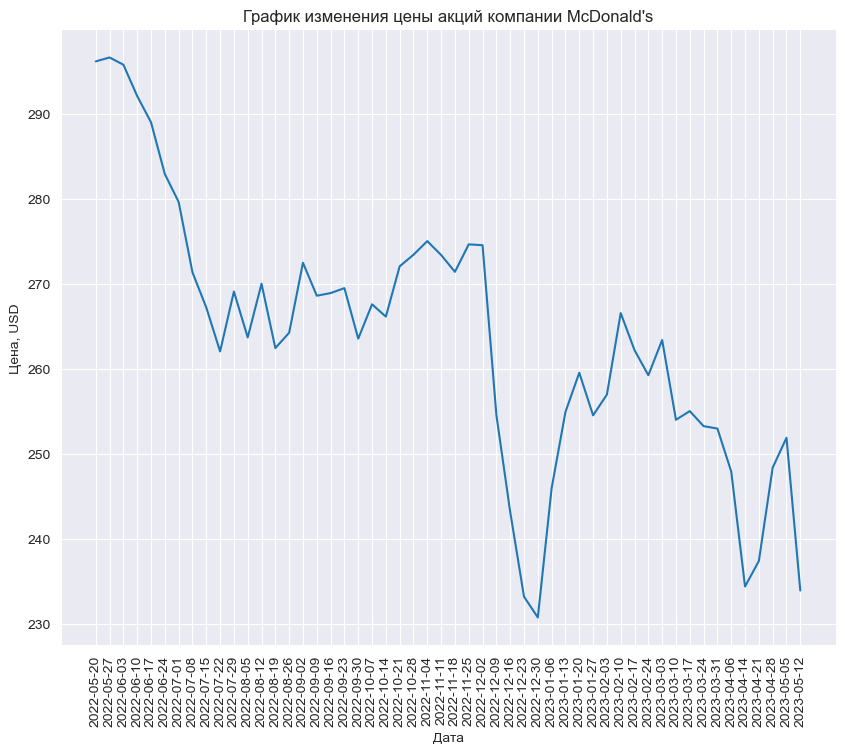

In [7]:
import pandas as pd
import requests
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

companies = {"Apple": "AAPL", "Microsoft": "MSFT", "Amazon": "AMZN", "Alphabet": "GOOGL", "Facebook": "FB",
             "Berkshire Hathaway": "BRK.A", "Johnson & Johnson": "JNJ", "JPMorgan Chase": "JPM", "Visa": "V",
             "Procter & Gamble": "PG", "Mastercard": "MA", "UnitedHealth Group": "UNH", "Walmart": "WMT",
             "Nestle": "NSRGF", "Coca-Cola": "KO", "Pfizer": "PFE", "Samsung Electronics": "SSNLF", "Intel": "INTC",
             "Verizon Communications": "VZ", "Toyota Motor": "TM", "AT&T": "T", "Merck & Co.": "MRK", "Chevron": "CVX",
             "ExxonMobil": "XOM", "Cisco Systems": "CSCO", "Oracle": "ORCL", "McDonald's": "MCD", "Walt Disney": "DIS",
             "BHP Group": "BHP", "Royal Dutch Shell": "RDS.A", "Johnson Controls International": "JCI", "Citigroup": "C",
             "Goldman Sachs Group": "GS", "General Electric": "GE", "Ford Motor": "F", "Boeing": "BA", "General Motors": "GM",
             "IBM": "IBM", "3M Company": "MMM", "American Express": "AXP", "Caterpillar Inc.": "CAT", "The Home Depot": "HD",
             "Nike Inc.": "NKE", "Pepsico Inc.": "PEP", "The Procter & Gamble Company": "PG", "The Walt Disney Company": "DIS",
             "The Coca-Cola Company": "KO"}

key = 'Z5IN9IF1V6QD998E'

def show(name):
    b_name = companies[name]
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={b_name}&apikey={key}'
    r = requests.get(url)
    data = r.json()
    date = []
    close = []
    today = datetime.datetime.today().strftime('%Y-%m-%d')
    year_ago = (datetime.datetime.strptime(today, '%Y-%m-%d') - datetime.timedelta(days=365)).strftime('%Y-%m-%d')
    for k, v in zip(data['Weekly Time Series'].keys(), data['Weekly Time Series'].values()):
        if time.strptime(year_ago, "%Y-%m-%d") < time.strptime(k, "%Y-%m-%d"):
            date.append(k)
            close.append(float(v['4. close']))
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.plot(date[::-1], close)
    plt.xlabel('Дата')
    plt.ylabel('Цена, USD')
    plt.title(f'График изменения цены акций компании {name}')
    plt.xticks(rotation = 'vertical');
    plt.savefig('graph')

show("McDonald's")